Michael Buchwitz, 7-May-2024

# How to access and use a satellite-derived GHG Level 2 data product using XCO2_EMMA as an example? 

This is a Jupyter Notebook (JN) illustrating how to access and use a satellite-derived Greenhouse Gas (GHG) atmospheric carbon dioxide (CO2) Level 2 data product as generated via the Copernicus Climate Change Service (C3S) and made available via the Copernicus Climate Data Store (CDS, https://cds.climate.copernicus.eu/).

Here we illustrate the use of a GHG Level 2 (L2) product using product XCO2_EMMA as an example. A CO2 L2 data product contains CO2 information for individual satellite ground pixels (also called footprints or soundings). XCO2 is the column-averaged dry-air mole fraction of atmospheric CO2 in parts per million (ppm). EMMA is the name of the multi-satellite XCO2 (and XCH4) merging algorithm developed to generate product XCO2_EMMA using as input individual Level 2 XCO2 products from different satellite sensors (here: SCIAMACHY/ENVISAT, GOSAT, GOSAT-2 and OCO-2; see, e.g., Reuter et al., https://amt.copernicus.org/articles/13/789/2020/, 2020). 

Within C3S also other L2 products are generated and made available via the CDS. These products are (i) XCO2 from individual satellite sensors, (ii) XCH4 products, where XCH4 is the column-averaged dry-air mole fraction of CH4 in parts per billion (ppb), and (iii) mid tropospheric CO2 and CH4 mixing ratio products. Detailed information on all these products is available via the CDS. In addition to L2 products, also Level 3 (L3) products are available. A L3 product is based on a corresponding L2 product. A L3 product is  obtained by spatio-temporally averaging a corresponding L2 product. How to access and use a L3 GHG product is shown in a separate Jupyter Notebook.

For this JN we use XCO2_EMMA version 4.4, which covers the period 2003 - 2021. 

This JN shows how to download a data product from the CDS, explains how to access the main variables and how to use them for a given applications. We focus on two use cases related to the spatial and temporal variation of atmospheric CO2 concentrations and their observational coverage. 

The first use case is related to the latitudial distribution of XCO2. We show how XCO2 averages and standard devations per latitude band can be computed and plotted. For this we use two days of observations, one in April and one in September. We explain that the observed latitudinal distributions are closely related to the seasonal cycle of CO2 due to uptake and release of CO2 by vegetation.

For the second use case we show how a map of the spatial distribution of the individual ground pixel XCO2 observations can be generated. We show that the spatial coverage of the daily observations is very sparse due to strict quality filtering of the individual XCO2 retrievals. Most applications therefore require appropriate spatio-temporal averaging (see, for example, the use of C3S GHG XCO2 and XCH4 data for assessments such as Copernicus European State of the Climate (ESOTC) as shown on the GHG concentration climate indicators website https://climate.copernicus.eu/climate-indicators/greenhouse-gas-concentrations).

## What is needed to use this Jupyter Notebook?

In the following, Phython 3 code is provided to read and plot the satellite data.

It is assumed that Python and Jupyter Notebook (JN) is installed on your computer, e.g., using the Anaconda distribution
(https://www.anaconda.com/products/distribution).

## Data download from CDS

C3S GHG data products can be obtained from the CDS via the CDS user interface. 

For satellite-derived CO2 please visit this website: 
https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-carbon-dioxide?tab=form.

Detailed information on all GHG products is provided via the "Documentation" tab. 

Product XCO2_EMMA can be downloaded by manual selection in the "Download data" tab. Please select:
- Processing level: Level 2
- Variable: Column-average dry-air mole fraction of atmospheric Carbon Dioxide (XCO2) and related variables
- Sensor and algorithm: MERGED and EMMA

For the following we assume that data for 2 days have been downloaded:
- File 1: 15-April-2020
- File 2: 15-September-2020

It is also assumed that the following version and format of the data is selected:
- Version: 4.4 
- Format: Zip file

For the following it is assumed that 2 zip files are extracted and moved to the current directory. 

The corresponding file names are:
- File 1: 20200415-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc
- File 2: 20200915-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc

These two data files need to be available in the current directory to successfully execute this JN.

## Imports

 The code starts with importing several modules as needed to run this JN.

In [1]:
import os
import os.path
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Initial steps:

Here some information on the selected product (which will be used later for the plots):

In [2]:
product_id = 'XCO2_EMMA' 
product_version = '4.4'  
product_str = product_id+' (v'+product_version+')'
print('* Selected product: ', product_str)

* Selected product:  XCO2_EMMA (v4.4)


Here some information on the selected days and corresponding file names:

In [3]:
# For file 1:
year_1_str = '2020'; month_1_str = '04'; month_name_1_str = 'Apr'; day_1_str = '15'
L2_file_1 = '20200415-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc'
file_1_date = year_1_str+month_1_str+day_1_str
file_1_date2 = day_1_str+'-'+month_name_1_str+'-'+year_1_str

# For file 2:
year_2_str = '2020'; month_2_str = '09'; month_name_2_str = 'Sep'; day_2_str = '15'
L2_file_2 = '20200915-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc'
file_2_date = year_2_str+month_2_str+day_2_str
file_2_date2 = day_2_str+'-'+month_name_2_str+'-'+year_2_str

print('* File 1: Day and file name: ', file_1_date2, L2_file_1)
print('* File 2: Day and file name: ', file_2_date2, L2_file_2)

* File 1: Day and file name:  15-Apr-2020 20200415-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc
* File 2: Day and file name:  15-Sep-2020 20200915-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc


## Is file 1 available in the current directory?

Here we check if file 1 is available in the current directory:

In [4]:
# First file available in current directory?
L2_file_1_available = 'no'
print('* File 1 available in current directory?: ', L2_file_1)
if ((os.path.exists(L2_file_1) == True)):
   print('* Yes, file 1 OK.')
   L2_file_1_available = 'yes'
else:
   print('* No ! Please download data from CDS (see: Data download from CDS)')

* File 1 available in current directory?:  20200415-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc
* Yes, file 1 OK.


## Is file 2 available in the current directory?

Here we check if file 2 is available in the current directory:

In [5]:
# Second file available in current directory?
L2_file_2_available = 'no'
print('* File 2 available in current directory?: ', L2_file_2)
if ((os.path.exists(L2_file_2) == True)):
   print('* Yes, file 2 OK.')
   L2_file_2_available = 'yes'
else:
   print('* No ! Please download data from CDS (see: Data download from CDS)')

* File 2 available in current directory?:  20200915-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc
* Yes, file 2 OK.


## Reading file 1

Now we are reading file 1:

In [6]:
L2_file_1_OK = 'no'
if (L2_file_1_available == 'yes'):
   # ---------------------------------------------
   print('* Reading L2 file 1: ', L2_file_1)
   ds_1 = Dataset(L2_file_1)
   all_1_xco2 = ds_1.variables['xco2'][:] # XCO2 in ppm
   all_1_xco2_unc = ds_1.variables['xco2_uncertainty'][:] # XCO2 uncertainty in ppm
   all_1_xco2_qual = ds_1.variables['xco2_quality_flag'][:] # xco2 quality?: 0=good
   all_1_latitude = ds_1.variables['latitude'][:] # ground pixel center latitude
   all_1_longitude = ds_1.variables['longitude'][:] # ground pixel center longitude
   n_all_1 = len(all_1_xco2)
   print('* File 1: Number of all ground pixels (footprints) read:', n_all_1)
   idg_1 = np.nonzero(all_1_xco2_qual == 0)
   g_1_xco2 = all_1_xco2[idg_1]
   g_1_xco2_unc = all_1_xco2_unc[idg_1]
   g_1_latitude = all_1_latitude[idg_1]
   g_1_longitude = all_1_longitude[idg_1]
   n_1_good = len(g_1_xco2)
   print('* File 1: Number of good ground pixels (footprints) read:', n_1_good)
   if n_1_good > 0:
      L2_file_1_OK = 'yes'
      print('* Reading L2 file 1 OK?: yes')
   else:
      print('* No good data available in file 1.')
      print('* Please download another data file.')
   # ---------------------------------------------
else:
   print('* ERROR: File 1 not available !?')
   print('* Please follow the instructions given above (see: Data download from CDS).')

* Reading L2 file 1:  20200415-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc
* File 1: Number of all ground pixels (footprints) read: 4333
* File 1: Number of good ground pixels (footprints) read: 4333
* Reading L2 file 1 OK?: yes


## Reading file 2:

Now we are reading file 2:

In [7]:
L2_file_2_OK = 'no'
if (L2_file_2_available == 'yes'):
   # ---------------------------------------------
   print('* Reading L2 file 2: ', L2_file_2)
   ds_2 = Dataset(L2_file_2)
   all_2_xco2 = ds_2.variables['xco2'][:] # XCO2 in ppm
   all_2_xco2_unc = ds_2.variables['xco2_uncertainty'][:] # XCO2 uncertainty in ppm
   all_2_xco2_qual = ds_2.variables['xco2_quality_flag'][:] # xco2 quality?: 0=good
   all_2_latitude = ds_2.variables['latitude'][:] # ground pixel center latitude
   all_2_longitude = ds_2.variables['longitude'][:] # ground pixel center longitude
   n_all_2 = len(all_2_xco2)
   print('* File 2: Number of all ground pixels (footprints) read:', n_all_2)
   idg_2 = np.nonzero(all_2_xco2_qual == 0)
   g_2_xco2 = all_2_xco2[idg_2]
   g_2_xco2_unc = all_2_xco2_unc[idg_2]
   g_2_latitude = all_2_latitude[idg_2]
   g_2_longitude = all_2_longitude[idg_2]
   n_2_good = len(g_2_xco2)
   print('* File 2: Number of good ground pixels (footprints) read:', n_2_good)
   if n_2_good > 0:
      L2_file_2_OK = 'yes'
      print('* Reading L2 file 2 OK?: yes')
   else:
      print('* No good data available in file 2.')
      print('* Please download another data file.')
   # ---------------------------------------------
else:
   print('* ERROR: File 2 not available !?')
   print('* Please follow the instructions given above (see: Data download from CDS).')

* Reading L2 file 2:  20200915-C3S-L2_GHG-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.4.nc
* File 2: Number of all ground pixels (footprints) read: 5455
* File 2: Number of good ground pixels (footprints) read: 5455
* Reading L2 file 2 OK?: yes


# Application 1: The latitudinal distribution of XCO2

Here our intention is to plot the data as a function of latitude. For this we first need to define the latitude bands.

### Definition of latitude bands

In [8]:
print('* Computing latitude band center coordinates')
lat_band_width = 10.0  # Width of latitude band in deg
d_lat = lat_band_width*0.5
lat_band_min = -90.0 + d_lat
lat_band_max = 90.0 - d_lat
n_lat_bands = int((lat_band_max - lat_band_min) / lat_band_width)+1
lat_band_center = np.zeros(n_lat_bands)
for ii in range(n_lat_bands):
   lat_band_center[ii] = lat_band_min + ii*lat_band_width
print('* lat_band_center: ', lat_band_center)

* Computing latitude band center coordinates
* lat_band_center:  [-85. -75. -65. -55. -45. -35. -25. -15.  -5.   5.  15.  25.  35.  45.
  55.  65.  75.  85.]


### Computing XCO2 vs latitude for file 1 data

Now we compute for each latitude band mean value and standard deviation of XCO2 from file 1 (we identify "No data" via a negative standard deviation): 

In [9]:
if (L2_file_1_OK == 'yes'):
   print('* Computing XCO2 as a function of latitude for the data from file 1')
   # Relevant input data:
   lat_1 = g_1_latitude
   ghg_1 = g_1_xco2
   # Init arrays:
   mean_ghg_1 = lat_band_center.copy() * 0.0
   std_ghg_1  = lat_band_center.copy() * 0.0 -999 # < 0 for too few data
   if 1 == 1:
      # Compute mean and standard deviation for each latitude band:
      for ii in range(n_lat_bands):
         act_lat = lat_band_center[ii]
         idg = np.where((lat_1 >= act_lat-d_lat) & (lat_1 < act_lat+d_lat))
         sel_1 = ghg_1[idg]; len_sel_1 = len(sel_1)
         #print('* len_sel_1: ', len_sel_1)
         if len_sel_1 > 1:
            mean_ghg_1[ii] = np.mean(sel_1)
            std_ghg_1[ii]  = np.std(sel_1)
   idg = (std_ghg_1 > 0.0)
   lb_1_xco2_mean = mean_ghg_1[idg]
   lb_1_xco2_std  = std_ghg_1[idg]
   lb_1_lat       = lat_band_center[idg]
   print('* lb_1_xco2_mean: ', lb_1_xco2_mean)
else:
   print('* ERROR: L2_file_1_OK: ', L2_file_1_OK)

* Computing XCO2 as a function of latitude for the data from file 1
* lb_1_xco2_mean:  [409.2081604  409.57675171 410.11950684 411.09332275 413.27044678
 414.57516479 415.73199463 414.98660278 415.58184814 415.88571167]


### Computing XCO2 vs latitude for file 2 data

Now we compute for each latitude band mean value and standard deviation of XCO2 from file 2: 

In [10]:
if (L2_file_2_OK == 'yes'):
   print('* Computing XCO2 as a function of latitude for the data from file 2')
   # Relevant input data:
   lat_2 = g_2_latitude
   ghg_2 = g_2_xco2
   # Init arrays:
   mean_ghg_2 = lat_band_center.copy() * 0.0
   std_ghg_2  = lat_band_center.copy() * 0.0 -999 # < 0 for too few data
   if 1 == 1:
      # Compute mean and standard deviation for each latitude band:
      for ii in range(n_lat_bands):
         act_lat = lat_band_center[ii]
         idg = np.where((lat_2 >= act_lat-d_lat) & (lat_2 < act_lat+d_lat))
         sel_2 = ghg_2[idg]; len_sel_2 = len(sel_2)
         #print('* len_sel_2: ', len_sel_2)
         if len_sel_2 > 1:
            mean_ghg_2[ii] = np.mean(sel_2)
            std_ghg_2[ii]  = np.std(sel_2)
   idg = (std_ghg_2 > 0.0)
   lb_2_xco2_mean = mean_ghg_2[idg]
   lb_2_xco2_std  = std_ghg_2[idg]
   lb_2_lat       = lat_band_center[idg]
   print('* lb_2_xco2_mean: ', lb_2_xco2_mean)
else:
   print('* ERROR: L2_file_2_OK: ', L2_file_2_OK)

* Computing XCO2 as a function of latitude for the data from file 2
* lb_2_xco2_mean:  [410.88873291 411.64834595 411.35818481 411.41366577 411.00924683
 411.05966187 410.6126709  411.75741577 410.67907715 409.0531311
 410.99816895]


## Generation of xy plot showing XCO2 vs latitude

Now we generate the desired plot:

* Generating XCO2 vs latitude plot ...
* Generating:  XCO2_EMMA_latitude.png


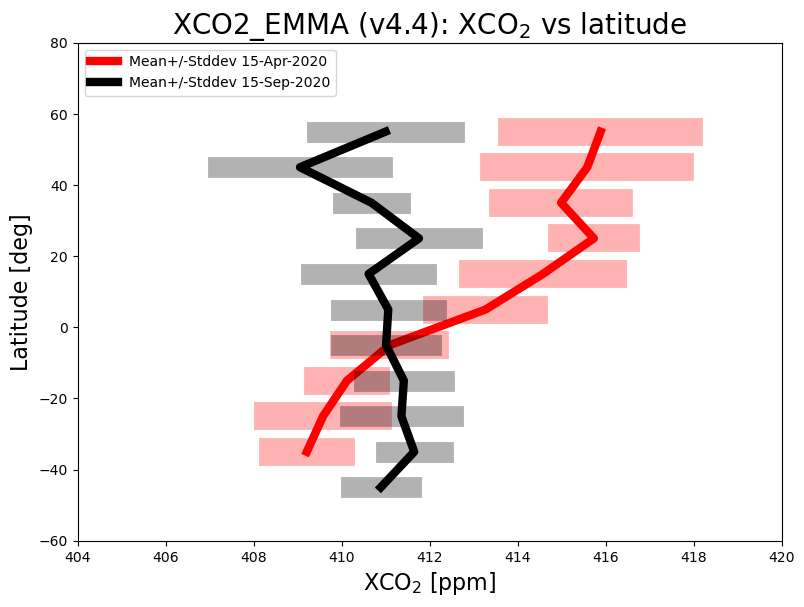

In [11]:
print('* Generating XCO2 vs latitude plot ...')
plot_type = 'png'
if ((L2_file_1_OK == 'yes') & (L2_file_2_OK == 'yes')):
   # Plot data:
   figsize = (8,6)
   fig = plt.figure(figsize=figsize)
   pos = [0.09,0.11,0.88,0.83]     # pos (l,b,w,h) in page coord
   ax  = fig.add_axes(pos)
   xmin = 404.0
   xmax = 420.0
   ymin = -60.0
   ymax =  80.0
   ax.axis([xmin, xmax, ymin, ymax])
   # -----------------------------------
   ax.plot(lb_1_xco2_mean, lb_1_lat, linewidth=6.0, color='red', zorder=39, label = 'Mean+/-Stddev '+file_1_date2)
   if 1 == 0:
      ax.plot(lb_1_xco2_mean-lb_1_xco2_std, lb_1_lat, linewidth=2.0, color='red', zorder=38)
      ax.plot(lb_1_xco2_mean+lb_1_xco2_std, lb_1_lat, linewidth=2.0, color='red', zorder=38)
   else:
      nn_1 = len(lb_1_xco2_mean)
      for ii in range(nn_1):
         yy = lb_1_lat[ii]
         x1 = lb_1_xco2_mean[ii]-lb_1_xco2_std[ii]
         x2 = lb_1_xco2_mean[ii]+lb_1_xco2_std[ii]
         ax.plot([x1, x2], [yy, yy], linewidth=20.0, color='red', zorder=38, alpha=0.3)
   # -----------------------------------
   ax.plot(lb_2_xco2_mean, lb_2_lat, linewidth=6.0, color='black', zorder=49, label = 'Mean+/-Stddev '+file_2_date2)
   if 1 == 0:
      ax.plot(lb_2_xco2_mean-lb_2_xco2_std, lb_2_lat, linewidth=2.0, color='black', zorder=48)
      ax.plot(lb_2_xco2_mean+lb_2_xco2_std, lb_2_lat, linewidth=2.0, color='black', zorder=48)
   else:
      nn_2 = len(lb_2_xco2_mean)
      for ii in range(nn_2):
         yy = lb_2_lat[ii]
         x1 = lb_2_xco2_mean[ii]-lb_2_xco2_std[ii]
         x2 = lb_2_xco2_mean[ii]+lb_2_xco2_std[ii]
         ax.plot([x1, x2], [yy, yy], linewidth=15.0, color='black', zorder=48, alpha=0.3)
   # -----------------------------------
   title = product_str
   x_label = 'XCO$_2$ [ppm]'
   y_label = 'Latitude [deg]'
   plot_title = product_str+': XCO$_2$ vs latitude'
   plt.title(plot_title, fontsize=20)
   plt.xlabel(x_label, fontsize=16); plt.ylabel(y_label, fontsize=16)
   plt.legend(loc='upper left')
   if plot_type == 'png':
      o_file_plot = product_id+'_latitude.png'
      print('* Generating: ', o_file_plot)
      plt.savefig(o_file_plot, dpi=600)
   else:
      plt.show()
else:
   print('* WARNING: Cannot generate plot. Input data not fully available:') 
   print('* L2_file_1_OK: ', L2_file_1_OK)
   print('* L2_file_2_OK: ', L2_file_2_OK)

The figure above shows mean value of XCO2 as a function of latitude (thick lines) and the corresponding variation (computed as standard deviation of the individual XCO2 retrievals) within each latitude band (semi-transparent horizontal bars) for 15-April-2020 (red) and 15-September-2020 (black). As can be seen, during September XCO2 shows quite little variation with latitude, whereas in April XCO2 is significantly higher over the northern hemisphere (NH) compared to the southern hemisphere (SH). This is due to the seasonal cycle of CO2 primarily resulting from regular uptake and release of atmospheric CO2 by growing and decaying vegetation (photosythesis and respiration). Vegetation uptake reduces the CO2 concentration over the NH during the growing season (spring and summer) compared to the dormant season (winter). Over the SH there is less vegetation and therefore CO2 is relatively constant (apart from the general increase due to CO2 emissions by burning fossil fuels). 

# Application 2: Showing daily data on a global map

Here we show how to generate a plot showing the spatial distribution of the data. As can be seen, we use only three variables: XCO2, latitude and longitude. We define a small region in terms of latitude and longitude corner coordinates and select only data in this region for the plot.

* Generating XCO2 map ...
* Number of ground pixel for map:  34
* Generating:  XCO2_EMMA_map.png


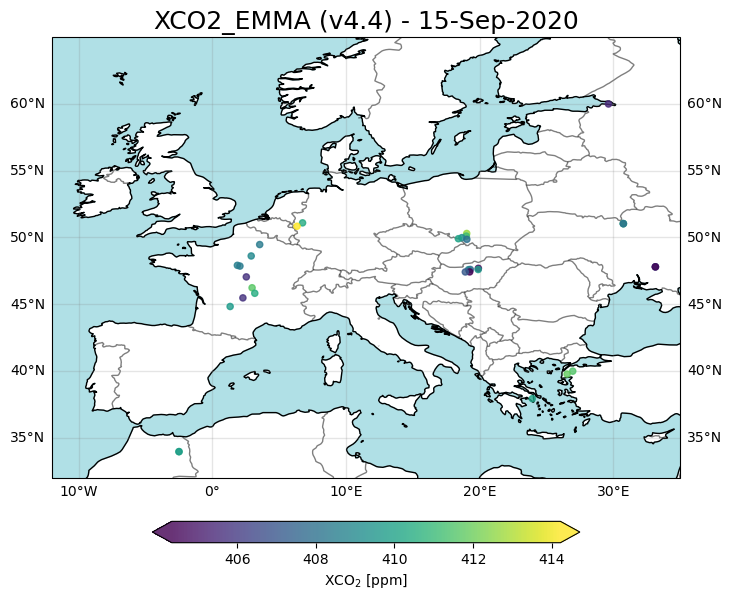

In [12]:
print('* Generating XCO2 map ...')
if L2_file_2_OK == 'yes':
   # Relevant input data:
   lat = g_2_latitude
   lon = g_2_longitude
   ghg = g_2_xco2
   plot_title = product_str+' - '+file_2_date2
   # Define spatial region of interest:
   lonmin = -12.0
   lonmax =  35.0
   latmin =  32.0
   latmax =  65.0
   # Select data to be shown on map:
   idg = np.nonzero((lat > latmin) & (lat < latmax) & (lon > lonmin) & (lon < lonmax))
   lat_sel = lat[idg]
   lon_sel = lon[idg]
   ghg_sel = ghg[idg]
   n_data = len(ghg_sel)
   rmin  = np.min(ghg_sel)
   rmax  = np.max(ghg_sel)
   if 1 == 0:
      rmin = 600
      rmax = 700  
   print('* Number of ground pixel for map: ', n_data)
   
   projection = ccrs.PlateCarree()
   figsize = (9,7)
   fig = plt.figure(figsize=figsize)
   pos = [0.05,0.00,0.95,0.90]     # pos (l,b,w,h) in page coord
   ax1 = fig.add_axes(pos, projection=projection)
   ax1.set_extent([lonmin, lonmax, latmin, latmax], crs=projection)
   ax1.add_feature(cfeature.OCEAN, color='powderblue')
   ax1.add_feature(cfeature.COASTLINE)
   ax1.add_feature(cfeature.BORDERS, alpha=0.5)
   #x_label = 'Latitude [deg]'
   #y_label = 'Longitude [deg]'
   
   ax1.set_title(plot_title, fontsize=18)
   drawmeridians_label = True
   gl = ax1.gridlines(crs=projection, draw_labels=drawmeridians_label, linewidth=1, color='gray', alpha=0.2)
   gl.top_labels  = False
   plt.scatter(lon_sel, lat_sel, c=ghg_sel, s=20, zorder=10, alpha=0.8, cmap='viridis', vmin=rmin, vmax=rmax)
   #anchor=(0.5, 1.0) # default
   anchor=(0.5, 1.7) # shoft upwards
   cb = plt.colorbar(label='XCO$_2$ [ppm]', location='bottom', extend='both', shrink=0.5, anchor=anchor)
   #cb = plt.colorbar(label='XCO$_2$ [ppm]', location='right', shrink=0.3)
   if plot_type == 'png':
      o_file_plot = product_id+'_map.png'
      print('* Generating: ', o_file_plot)
      plt.savefig(o_file_plot, dpi=600)
   else:
      plt.show()
else:
   print('* WARNING: Cannot generate map plot. No data !?')

The figure above shows the locations of the individual ground pixel observations and their corresponding XCO2 value using all "good" retrievals over Europe and surrounding area for 15-Sept-2020. As can be seen, the spatial coverage of the daily data is very sparse. This is because only data of the highest quality are contained in the product file. Strict quality filtering is important to meet the demanding requirements on accuracy and precision for satellite XCO2 data observations.